In [873]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [874]:
df = pd.read_csv('dataset.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


In [875]:
data = pd.read_csv("dataset.csv")
size = data.size
shape = data.shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))


Size = 950000
Shape =(50000, 19)
Shape[0] x Shape[1] = 950000


In [876]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [877]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [878]:
data = pd.read_csv("dataset.csv")  
data.dropna(inplace = True) 
perc =[.20, .40, .60, .80]
include =['object', 'float', 'int']
desc = data.describe(percentiles = perc, include = include)
desc

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
count,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
unique,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [879]:
df_first_5 = df.head(5)
print(df_first_5)


  business_code cust_number  ...    invoice_id isOpen
0          U001  0200769623  ...  1.930438e+09      0
1          U001  0200980828  ...  1.929646e+09      0
2          U001  0200792734  ...  1.929874e+09      0
3          CA02  0140105686  ...  2.960623e+09      1
4          U001  0200769623  ...  1.930148e+09      0

[5 rows x 19 columns]


In [880]:
df = pd.read_csv('dataset.csv')
df.isnull().mean() * 100
df.isnull().sum() / df.shape[0] * 100.00
percent= 100*(len(df.loc[:,df.isnull().sum(axis=0)>=1 ].index) / len(df.index))
print(round(percent,2))

100.0


In [881]:
df.loc[:,["invoice_id","doc_id"]]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


In [882]:
df.loc[:,['baseline_create_date','document_create_date.1']]

,baseline_create_date,document_create_date.1
0,20200126.0,20200126
1,20190722.0,20190722
2,20190914.0,20190914
3,20200331.0,20200330
4,20191113.0,20191113
...,...,...
49995,20200421.0,20200421
49996,20190815.0,20190815
49997,20200219.0,20200219
49998,20191127.0,20191127


In [883]:
df.isnull().sum()


business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [884]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: document_create_date.1, dtype: datetime64[ns]

In [885]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2020-02-11
1   2019-08-08
2   2019-12-30
3          NaT
4   2019-11-25
Name: clear_date, dtype: datetime64[ns]

In [886]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: posting_date, dtype: datetime64[ns]

In [887]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2020-02-10
1   2019-08-11
2   2019-09-29
3   2020-04-10
4   2019-11-28
Name: due_in_date, dtype: datetime64[ns]

In [888]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-31
4   2019-11-13
Name: baseline_create_date, dtype: datetime64[ns]

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [890]:
df.dropna(axis=1,how='all',inplace=True)
df.shape

(50000, 18)

In [891]:
df["document type"].value_counts()

RV    49994
X2        6
Name: document type, dtype: int64

In [892]:
df.dropna(axis=0,subset=['invoice_id'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,20200125,2020-01-26,2020-02-10,USD,RV,1.0,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,20190722,2019-07-22,2019-08-11,USD,RV,1.0,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,20190914,2019-09-14,2019-09-29,USD,RV,1.0,2253.86,2019-09-14,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,20200330,2020-03-30,2020-04-10,CAD,RV,1.0,3299.70,2020-03-31,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,20191113,2019-11-13,2019-11-28,USD,RV,1.0,33133.29,2019-11-13,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,20200417,2020-04-21,2020-05-06,USD,RV,1.0,3187.86,2020-04-21,NAA8,1.930797e+09,1
49990,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,20190814,2019-08-15,2019-08-30,USD,RV,1.0,6766.54,2019-08-15,NAH4,1.929744e+09,0
49991,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,20200218,2020-02-19,2020-03-05,USD,RV,1.0,6120.86,2020-02-19,NAA8,1.930537e+09,0
49992,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,20191126,2019-11-27,2019-12-12,USD,RV,1.0,63.48,2019-11-27,NAA8,1.930199e+09,0


In [893]:
for cols in df.columns:   
    print(f"{cols} - {df[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1424
name_customer - 4193
clear_date - 403
buisness_year - 2
doc_id - 48833
posting_date - 506
document_create_date - 507
document_create_date.1 - 506
due_in_date - 547
invoice_currency - 2
document type - 1
posting_id - 1
total_open_amount - 44344
baseline_create_date - 506
cust_payment_terms - 74
invoice_id - 48833
isOpen - 2


In [894]:
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['document type', 'posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen'],
      dtype='object')

In [895]:
df.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
isOpen                    False
dtype: bool

In [896]:
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

In [897]:
dr=findDuplicateColumns(df)
dr

['posting_date', 'doc_id']

In [898]:
df.drop(columns=dr,inplace=True) 

In [899]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49994 entries, 0 to 49993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           49994 non-null  object        
 1   cust_number             49994 non-null  object        
 2   name_customer           49994 non-null  object        
 3   clear_date              39994 non-null  datetime64[ns]
 4   buisness_year           49994 non-null  float64       
 5   document_create_date    49994 non-null  int64         
 6   document_create_date.1  49994 non-null  datetime64[ns]
 7   due_in_date             49994 non-null  datetime64[ns]
 8   invoice_currency        49994 non-null  object        
 9   total_open_amount       49994 non-null  float64       
 10  baseline_create_date    49994 non-null  datetime64[ns]
 11  cust_payment_terms      49994 non-null  object        
 12  invoice_id              49994 non-null  float6

In [900]:
df.drop(columns=['document_create_date'],inplace=True)

In [901]:
df.drop(columns=['invoice_id'],inplace=True) 
df


,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49989,U001,0200561861,CO corporation,NaT,2020.0,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,1
49990,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,0
49991,U001,0200772595,SAFEW associates,2020-03-05,2020.0,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,0
49992,U001,0200726979,BJ'S llc,2019-12-12,2019.0,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,0


In [902]:
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [903]:
df.sort_values(by='document_create_date.1',inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
43098,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
32817,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
44611,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
15510,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
1268,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
7528,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
48269,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
411,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


In [904]:
test_data = df[df.clear_date.isnull()].reset_index()
test_data.drop(columns=['index'],inplace=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,32922.51,2020-02-27,NAH4,1,NaN
1,U001,0200806580,BE systems,NaT,2020.0,2020-02-27,2020-03-13,USD,4827.34,2020-02-27,NAA8,1,NaN
2,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,2020-03-13,USD,14706.47,2020-02-27,NAH4,1,NaN
3,U001,0200726979,BJ'S us,NaT,2020.0,2020-02-27,2020-03-13,USD,413.83,2020-02-27,NAA8,1,NaN
4,U001,0200014556,ALBER corporation,NaT,2020.0,2020-02-27,2020-05-02,USD,15651.65,2020-02-27,NAGD,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
9996,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
9997,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
9998,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


In [905]:
ts = test_data.copy()

In [906]:
y_test = test_data["delay"]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: delay, Length: 10000, dtype: float64

In [907]:
x_test = test_data.iloc[:,:-1].copy()
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,32922.51,2020-02-27,NAH4,1
1,U001,0200806580,BE systems,NaT,2020.0,2020-02-27,2020-03-13,USD,4827.34,2020-02-27,NAA8,1
2,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,2020-03-13,USD,14706.47,2020-02-27,NAH4,1
3,U001,0200726979,BJ'S us,NaT,2020.0,2020-02-27,2020-03-13,USD,413.83,2020-02-27,NAA8,1
4,U001,0200014556,ALBER corporation,NaT,2020.0,2020-02-27,2020-05-02,USD,15651.65,2020-02-27,NAGD,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1
9996,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1
9997,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1
9998,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1


In [908]:
train_data2 = df[df.clear_date.notnull()].reset_index() #train set on non-null clear date
train_data2.drop(columns=['index'],inplace=True)
train_data2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
39990,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
39991,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
39992,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


In [909]:
x = train_data2['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] <= x].iloc[-1]
print(y) 
train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] == y].last_valid_index()

2020-01-12 00:00:00


35838

In [910]:
val2 = train_data2.iloc[35838: , :].copy()
val2.reset_index(drop=True,inplace=True)
val2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200726979,BJ'S corp,2020-01-27,2020.0,2020-01-12,2020-01-27,USD,417.05,2020-01-12,NAA8,0,0.0
1,U001,0200762301,C&S WH corp,2020-01-28,2020.0,2020-01-13,2020-01-28,USD,8940.20,2020-01-13,NAC6,0,0.0
2,U001,0200729942,SA corporation,2020-01-28,2020.0,2020-01-13,2020-01-28,USD,5396.01,2020-01-13,NAA8,0,0.0
3,CA02,0140105686,SYSC associates,2020-02-04,2020.0,2020-01-13,2020-02-01,CAD,25025.65,2020-01-22,CA10,0,3.0
4,U001,0200762301,C&S WH foundation,2020-01-28,2020.0,2020-01-13,2020-01-28,USD,15824.07,2020-01-13,NAC6,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
4152,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
4153,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
4154,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


In [911]:
train_data1 = pd.concat([train_data2, val2]).drop_duplicates(keep=False)
train_data1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35833,CA02,0100034822,SUGARP corporation,2020-02-05,2020.0,2020-01-12,2020-01-31,CAD,10655.10,2020-01-21,CA10,0,5.0
35834,U001,0200759878,SA us,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,13891.02,2020-01-12,NAH4,0,1.0
35835,U001,0200769623,WAL-MAR trust,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,21795.65,2020-01-12,NAH4,0,-4.0
35836,U001,0200769623,WAL-MAR co,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,826.01,2020-01-12,NAH4,0,-4.0


In [912]:
x2 = train_data1['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y2 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] <= x2].iloc[-1]
print(y2)
train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] == y2].last_valid_index() 

2019-11-27 00:00:00


32958

In [913]:
val1 = train_data1.iloc[32958: , :].copy()
val1.reset_index(drop=True,inplace=True)
val1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200707822,PUBLI corporation,2019-12-30,2019.0,2019-12-15,2019-12-30,USD,23231.67,2019-12-15,NAA8,0,0.0
1,U001,0200726979,BJ'S associates,2019-12-30,2019.0,2019-12-15,2019-12-30,USD,642.66,2019-12-15,NAA8,0,0.0
2,CA02,0140104409,LOB in,2019-12-30,2019.0,2019-12-15,2020-01-02,CAD,201.50,2019-12-23,CA10,0,-3.0
3,U001,0200148860,DOLLA in,2019-12-30,2019.0,2019-12-15,2019-12-30,USD,15797.76,2019-12-15,NAA8,0,0.0
4,U001,0200769623,WAL-MAR co,2019-12-31,2019.0,2019-12-15,2019-12-30,USD,11611.60,2019-12-15,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,CA02,0100034822,SUGARP corporation,2020-02-05,2020.0,2020-01-12,2020-01-31,CAD,10655.10,2020-01-21,CA10,0,5.0
1340,U001,0200759878,SA us,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,13891.02,2020-01-12,NAH4,0,1.0
1341,U001,0200769623,WAL-MAR trust,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,21795.65,2020-01-12,NAH4,0,-4.0
1342,U001,0200769623,WAL-MAR co,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,826.01,2020-01-12,NAH4,0,-4.0


In [914]:
train_data = pd.concat([train_data1, val1]).drop_duplicates(keep=False)
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,U001,0200769623,WAL-MAR us,2019-12-27,2019.0,2019-12-15,2019-12-30,USD,71699.73,2019-12-15,NAH4,0,-3.0
34440,U001,0200776463,KROGE corporation,2019-12-30,2019.0,2019-12-15,2019-12-30,USD,19436.30,2019-12-15,NAA8,0,0.0
34441,U001,0200148860,DOLLA foundation,2019-12-30,2019.0,2019-12-15,2019-12-30,USD,14776.32,2019-12-15,NAA8,0,0.0
34442,U001,0200706844,WINC in,2019-12-31,2019.0,2019-12-15,2019-12-30,USD,18644.84,2019-12-15,NAA8,0,1.0


In [915]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32958 entries, 0 to 34443
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32958 non-null  object        
 1   cust_number             32958 non-null  object        
 2   name_customer           32958 non-null  object        
 3   clear_date              32958 non-null  datetime64[ns]
 4   buisness_year           32958 non-null  float64       
 5   document_create_date.1  32958 non-null  datetime64[ns]
 6   due_in_date             32958 non-null  datetime64[ns]
 7   invoice_currency        32958 non-null  object        
 8   total_open_amount       32958 non-null  float64       
 9   baseline_create_date    32958 non-null  datetime64[ns]
 10  cust_payment_terms      32958 non-null  object        
 11  isOpen                  32958 non-null  int64         
 12  delay                   32958 non-null  float6

In [916]:
train_data.business_code.value_counts()

U001    29745
CA02     2676
U013      421
U002      105
U005        9
U007        2
Name: business_code, dtype: int64

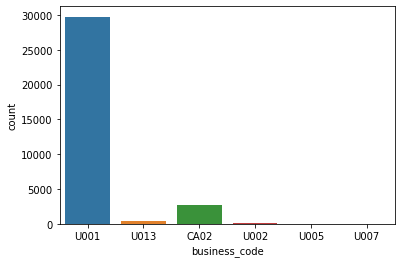

In [917]:
sns.countplot(x = train_data['business_code'])

In [918]:
train_data.cust_number.value_counts()

0200769623    7292
0200726979    1195
0200762301     972
0200759878     863
0200794332     722
              ... 
0200758531       1
0100043885       1
200792283        1
0200943457       1
0200739074       1
Name: cust_number, Length: 1279, dtype: int64

In [919]:
len(dict(train_data.cust_number.value_counts()))

1279

In [920]:
train_data.name_customer.value_counts()

WAL-MAR trust          781
WAL-MAR                745
WAL-MAR in             743
WAL-MAR corporation    736
WAL-MAR corp           735
                      ... 
CHIHAD co                1
MARTIN  trust            1
SYSCO IN us              1
GLOBA us                 1
TFC us                   1
Name: name_customer, Length: 3596, dtype: int64

In [921]:
train_data.clear_date.min()

Timestamp('2019-01-03 00:00:00')

In [922]:
train_data.clear_date.max()

Timestamp('2019-12-31 00:00:00')

In [923]:
clear_month = train_data.clear_date.dt.month
clear_month.value_counts()

5     3246
4     3044
10    3008
11    2981
8     2944
7     2927
3     2849
12    2813
9     2798
6     2679
2     2379
1     1290
Name: clear_date, dtype: int64

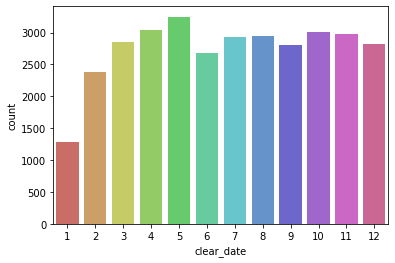

In [924]:
sns.countplot(x=clear_month, palette="hls")

In [925]:
train_data.buisness_year.value_counts()

2019.0    32958
Name: buisness_year, dtype: int64

In [926]:
train_data["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [927]:
train_data["document_create_date.1"].max()

Timestamp('2019-12-15 00:00:00')

In [928]:
train_data["invoice_currency"].value_counts()

USD    30280
CAD     2678
Name: invoice_currency, dtype: int64

In [929]:
train_data['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count     32958.000000
mean      32192.198099
std       39984.661856
min           0.790000
25%        4688.977500
50%       17238.615000
75%       46542.090000
max      668593.360000
Name: total_open_amount, dtype: object

In [930]:
open_amount_bins = pd.qcut(train_data['total_open_amount'],q=10)
open_amount_bins.value_counts()

(0.789, 828.458]          3296
(828.458, 2945.162]       3296
(2945.162, 6981.297]      3296
(12783.288, 17238.615]    3296
(17238.615, 25411.306]    3296
(39300.594, 54979.266]    3296
(54979.266, 82017.985]    3296
(82017.985, 668593.36]    3296
(6981.297, 12783.288]     3295
(25411.306, 39300.594]    3295
Name: total_open_amount, dtype: int64

In [931]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_data['total_open_amount'], bins = amount_bins)

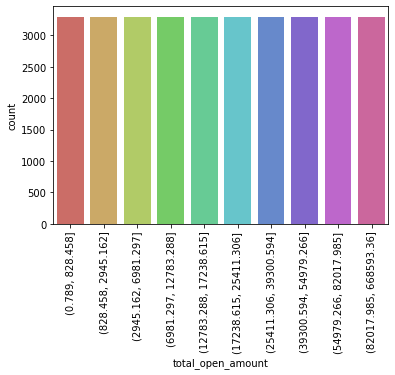

In [932]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")

In [933]:
train_data.loc[train_data["document_create_date.1"]!=train_data["baseline_create_date"]]

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
30,CA02,0140106181,THE corp,2019-05-01,2019.0,2018-12-30,2019-01-10,CAD,117723.35,2018-12-31,CA10,0,111.0
92,CA02,0140104423,METRO,2019-01-18,2019.0,2018-12-31,2019-01-12,CAD,71231.97,2019-01-02,CA10,0,6.0
127,CA02,0140104340,COLABOR systems,2019-01-17,2019.0,2018-12-31,2019-01-13,CAD,1824.47,2019-01-03,CA10,0,4.0
167,CA02,0140105785,SHOPPE trust,2019-01-25,2019.0,2019-01-02,2019-01-21,CAD,45710.70,2019-01-11,CA10,0,4.0
169,CA02,0140104409,LOB corp,2019-01-18,2019.0,2019-01-02,2019-01-14,CAD,259891.02,2019-01-04,CA10,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34343,CA02,0140104240,FEDER trust,2019-12-30,2019.0,2019-12-13,2019-12-29,CAD,174769.75,2019-12-19,CA10,0,1.0
34353,CA02,0140104440,SO associates,2019-12-31,2019.0,2019-12-13,2019-12-27,CAD,16832.57,2019-12-17,CA10,0,4.0
34404,CA02,0140104423,METRO corp,2019-12-24,2019.0,2019-12-14,2019-12-26,CAD,285167.16,2019-12-16,CA10,0,-2.0
34437,CA02,0140106408,WAL-M us,2019-12-30,2019.0,2019-12-15,2019-12-26,CAD,119903.42,2019-12-16,CA10,0,4.0


In [934]:
train_data.cust_payment_terms.value_counts()

NAA8    13176
NAH4     8719
CA10     2591
NAC6     1099
NAM4      870
        ...  
NAUW        1
NAD8        1
NABD        1
NAUY        1
CA60        1
Name: cust_payment_terms, Length: 69, dtype: int64

In [935]:
len(dict(train_data.cust_number.value_counts()))

1279

In [936]:
train_data.isOpen.value_counts()

0    32958
Name: isOpen, dtype: int64

In [937]:
train_data.delay[train_data.delay<0].count()

12051

In [938]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
train_data.delay[train_data.delay<0].count()

0

In [939]:
train_data.delay.describe()

count    32958.000000
mean         2.722131
std          9.143224
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        204.000000
Name: delay, dtype: float64

In [940]:
train_data['invoice_currency'].value_counts()

USD    30280
CAD     2678
Name: invoice_currency, dtype: int64

In [941]:
train_data.groupby("business_code").invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  2676
U001           USD                 29745
U002           USD                   105
U005           USD                     9
U007           USD                     2
U013           USD                   419
               CAD                     2
Name: invoice_currency, dtype: int64

In [942]:
train_data.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2676
                  U013                 2
USD               U001             29745
                  U013               419
                  U002               105
                  U005                 9
                  U007                 2
Name: business_code, dtype: int64

In [943]:
temp = train_data.loc[train_data['business_code'] == 'U013']
temp.loc[temp['invoice_currency']=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
704,U013,0100052318,PRATT' systems,2019-02-23,2019.0,2019-01-08,2019-02-07,CAD,3880.79,2019-01-08,NAVE,0,16.0
32790,U013,0100052318,PRATT' co,2019-12-24,2019.0,2019-11-26,2019-12-26,CAD,3373.05,2019-11-26,NAVE,0,0.0


In [944]:
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_data['delay'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",2830,93,84,68,88
"(5000, 10000]",1277,56,62,37,24
"(10000, 50000]",5430,239,151,86,59
"(50000, 100000]",2197,42,15,7,12
"(100000, 1100000]",1043,16,15,7,4


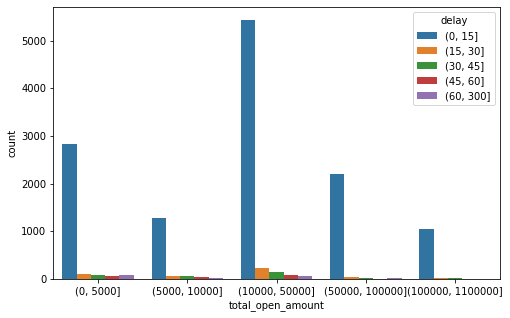

In [945]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

In [946]:
train_data.corr()

,buisness_year,total_open_amount,isOpen,delay
buisness_year,NaN,NaN,NaN,NaN
total_open_amount,NaN,1.000000,NaN,-0.042408
isOpen,NaN,NaN,NaN,NaN
delay,NaN,-0.042408,NaN,1.000000


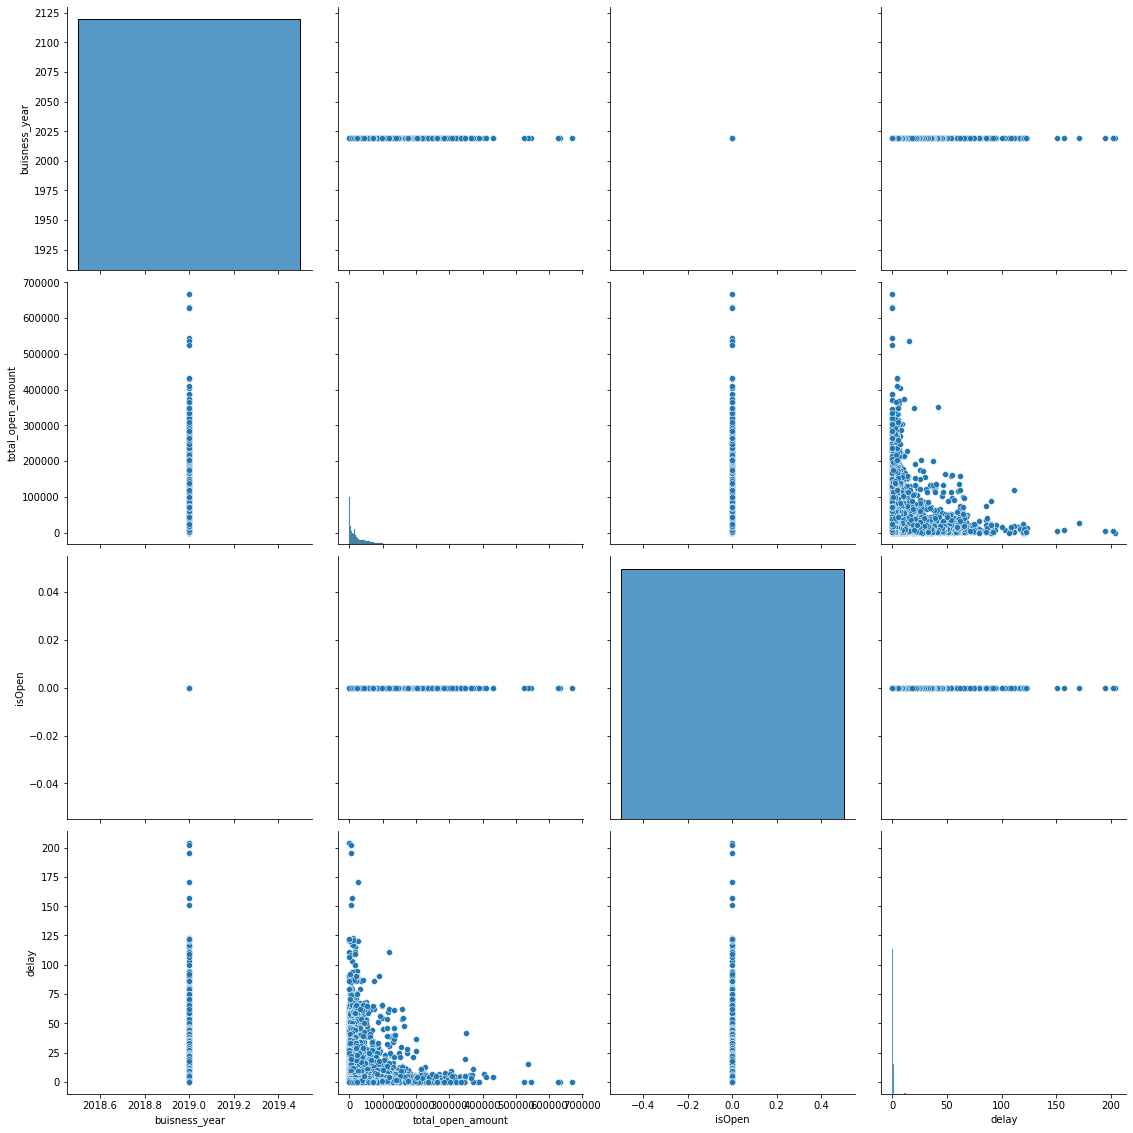

In [947]:
sns.pairplot(train_data, height=4)

In [948]:
train_data.drop(columns=['business_code', 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0
...,...,...,...,...,...,...
34439,0200769623,2019-12-27,2019-12-15,2019-12-30,71699.73,0.0
34440,0200776463,2019-12-30,2019-12-15,2019-12-30,19436.30,0.0
34441,0200148860,2019-12-30,2019-12-15,2019-12-30,14776.32,0.0
34442,0200706844,2019-12-31,2019-12-15,2019-12-30,18644.84,1.0


In [949]:
train_data["doc_create_day"] = train_data["document_create_date.1"].dt.day
train_data["doc_create_month"] = train_data["document_create_date.1"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day
train_data["due_month"] = train_data["due_in_date"].dt.month

In [950]:
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0,30,12,14,1
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0,30,12,14,1
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0,30,12,14,1
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0,30,12,14,1
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
34439,0200769623,2019-12-27,2019-12-15,2019-12-30,71699.73,0.0,15,12,30,12
34440,0200776463,2019-12-30,2019-12-15,2019-12-30,19436.30,0.0,15,12,30,12
34441,0200148860,2019-12-30,2019-12-15,2019-12-30,14776.32,0.0,15,12,30,12
34442,0200706844,2019-12-31,2019-12-15,2019-12-30,18644.84,1.0,15,12,30,12


In [951]:
train_data.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train_data

,cust_number,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,14559.00,0.0,30,12,14,1
1,0200769623,25749.68,0.0,30,12,14,1
2,0200726979,58.18,1.0,30,12,14,1
3,0200769623,4890.99,0.0,30,12,14,1
4,0200769623,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...
34439,0200769623,71699.73,0.0,15,12,30,12
34440,0200776463,19436.30,0.0,15,12,30,12
34441,0200148860,14776.32,0.0,15,12,30,12
34442,0200706844,18644.84,1.0,15,12,30,12


In [952]:
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')
train_data.drop('cust_number',axis=1,inplace=True)
train_data

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,0.0,30,12,14,1,0200769623
1,25749.68,0.0,30,12,14,1,0200769623
2,58.18,1.0,30,12,14,1,0200726979
3,4890.99,0.0,30,12,14,1,0200769623
4,9785.88,1.0,30,12,14,1,0200769623
...,...,...,...,...,...,...,...
34439,71699.73,0.0,15,12,30,12,0200769623
34440,19436.30,0.0,15,12,30,12,0200776463
34441,14776.32,0.0,15,12,30,12,0200148860
34442,18644.84,1.0,15,12,30,12,0200706844


In [953]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32958 entries, 0 to 34443
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  32958 non-null  float64
 1   delay              32958 non-null  float64
 2   doc_create_day     32958 non-null  int64  
 3   doc_create_month   32958 non-null  int64  
 4   due_day            32958 non-null  int64  
 5   due_month          32958 non-null  int64  
 6   cn                 32958 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 3.0+ MB


In [954]:
train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32958 entries, 0 to 34443
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  32958 non-null  float64
 1   delay              32958 non-null  float64
 2   doc_create_day     32958 non-null  int64  
 3   doc_create_month   32958 non-null  int64  
 4   due_day            32958 non-null  int64  
 5   due_month          32958 non-null  int64  
 6   cn                 32958 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.0 MB


In [955]:
y_train = train_data['delay']
y_train

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
34439    0.0
34440    0.0
34441    0.0
34442    1.0
34443    0.0
Name: delay, Length: 32958, dtype: float64

In [956]:
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,30,12,14,1,200769623.0
1,25749.68,30,12,14,1,200769623.0
2,58.18,30,12,14,1,200726979.0
3,4890.99,30,12,14,1,200769623.0
4,9785.88,30,12,14,1,200769623.0
...,...,...,...,...,...,...
34439,71699.73,15,12,30,12,200769623.0
34440,19436.30,15,12,30,12,200776463.0
34441,14776.32,15,12,30,12,200148860.0
34442,18644.84,15,12,30,12,200706844.0


In [957]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           1344 non-null   object        
 1   cust_number             1344 non-null   object        
 2   name_customer           1344 non-null   object        
 3   clear_date              1344 non-null   datetime64[ns]
 4   buisness_year           1344 non-null   float64       
 5   document_create_date.1  1344 non-null   datetime64[ns]
 6   due_in_date             1344 non-null   datetime64[ns]
 7   invoice_currency        1344 non-null   object        
 8   total_open_amount       1344 non-null   float64       
 9   baseline_create_date    1344 non-null   datetime64[ns]
 10  cust_payment_terms      1344 non-null   object        
 11  isOpen                  1344 non-null   int64         
 12  delay                   1344 non-null   float64 

In [958]:
val1['delay']=val1.delay.apply(lambda x: 0 if x<0 else x)
val1.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val1["doc_create_day"] = val1["document_create_date.1"].dt.day
val1["doc_create_month"] = val1["document_create_date.1"].dt.month

val1["due_day"] = val1["due_in_date"].dt.day
val1["due_month"] = val1["due_in_date"].dt.month

val1['cn'] = val1['cust_number'].str.extract('(\d+)')
val1.drop('cust_number',axis=1,inplace=True)

val1.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val1

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,23231.67,0.0,15,12,30,12,0200707822
1,642.66,0.0,15,12,30,12,0200726979
2,201.50,0.0,15,12,2,1,0140104409
3,15797.76,0.0,15,12,30,12,0200148860
4,11611.60,1.0,15,12,30,12,0200769623
...,...,...,...,...,...,...,...
1339,10655.10,5.0,12,1,31,1,0100034822
1340,13891.02,1.0,12,1,27,1,0200759878
1341,21795.65,0.0,12,1,27,1,0200769623
1342,826.01,0.0,12,1,27,1,0200769623


In [959]:
val1['cn']=val1['cn'].astype(str).astype(float)
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  1344 non-null   float64
 1   delay              1344 non-null   float64
 2   doc_create_day     1344 non-null   int64  
 3   doc_create_month   1344 non-null   int64  
 4   due_day            1344 non-null   int64  
 5   due_month          1344 non-null   int64  
 6   cn                 1344 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.6 KB


In [960]:
y_val1 = val1['delay']
y_val1

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1339    5.0
1340    1.0
1341    0.0
1342    0.0
1343    1.0
Name: delay, Length: 1344, dtype: float64

In [961]:
x_val1 = val1.drop(["delay"], axis=1).copy()
x_val1

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,23231.67,15,12,30,12,200707822.0
1,642.66,15,12,30,12,200726979.0
2,201.50,15,12,2,1,140104409.0
3,15797.76,15,12,30,12,200148860.0
4,11611.60,15,12,30,12,200769623.0
...,...,...,...,...,...,...
1339,10655.10,12,1,31,1,100034822.0
1340,13891.02,12,1,27,1,200759878.0
1341,21795.65,12,1,27,1,200769623.0
1342,826.01,12,1,27,1,200769623.0


In [962]:
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["doc_create_day"] = val2["document_create_date.1"].dt.day
val2["doc_create_month"] = val2["document_create_date.1"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val2

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,417.05,0.0,12,1,27,1,0200726979
1,8940.20,0.0,13,1,28,1,0200762301
2,5396.01,0.0,13,1,28,1,0200729942
3,25025.65,3.0,13,1,1,2,0140105686
4,15824.07,0.0,13,1,28,1,0200762301
...,...,...,...,...,...,...,...
4151,44450.82,0.0,26,2,12,3,0200571849
4152,67471.47,0.0,26,2,12,3,0200769623
4153,10349.36,6.0,27,2,13,3,0200418007
4154,49290.19,0.0,27,2,13,3,0200759878


In [963]:
val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156 entries, 0 to 4155
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  4156 non-null   float64
 1   delay              4156 non-null   float64
 2   doc_create_day     4156 non-null   int64  
 3   doc_create_month   4156 non-null   int64  
 4   due_day            4156 non-null   int64  
 5   due_month          4156 non-null   int64  
 6   cn                 4156 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 227.4 KB


In [964]:
y_val2 = val2['delay']
y_val2

0       0.0
1       0.0
2       0.0
3       3.0
4       0.0
       ... 
4151    0.0
4152    0.0
4153    6.0
4154    0.0
4155    3.0
Name: delay, Length: 4156, dtype: float64

In [965]:
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,417.05,12,1,27,1,200726979.0
1,8940.20,13,1,28,1,200762301.0
2,5396.01,13,1,28,1,200729942.0
3,25025.65,13,1,1,2,140105686.0
4,15824.07,13,1,28,1,200762301.0
...,...,...,...,...,...,...
4151,44450.82,26,2,12,3,200571849.0
4152,67471.47,26,2,12,3,200769623.0
4153,10349.36,27,2,13,3,200418007.0
4154,49290.19,27,2,13,3,200759878.0


In [966]:
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,32922.51,27,2,13,3,0200769623
1,4827.34,27,2,13,3,0200806580
2,14706.47,27,2,13,3,0200769623
3,413.83,27,2,13,3,0200726979
4,15651.65,27,2,2,5,0200014556
...,...,...,...,...,...,...
9995,34301.32,15,5,30,5,0200541916
9996,22835.50,17,5,1,6,0200759878
9997,1232.00,18,5,2,6,0200915438
9998,7035.00,19,5,19,5,0100027744


In [967]:
x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  10000 non-null  float64
 1   doc_create_day     10000 non-null  int64  
 2   doc_create_month   10000 non-null  int64  
 3   due_day            10000 non-null  int64  
 4   due_month          10000 non-null  int64  
 5   cn                 10000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


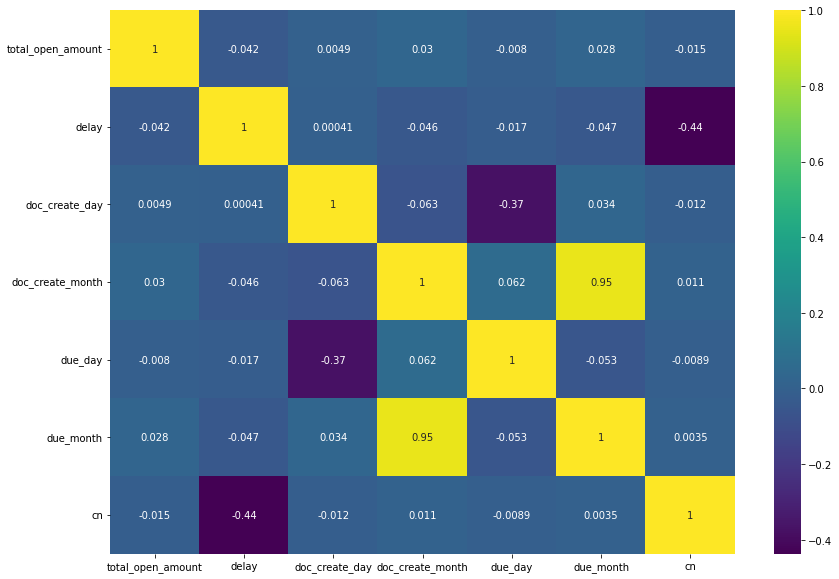

In [968]:
plt.figure(figsize=(14,10))
cor = train_data.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

In [969]:
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val1 = x_val1.drop(["due_month"], axis=1).copy()
x_val2 = x_val2.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

In [970]:
pip install xgboost

In [971]:
clf = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
clf.fit(x_train, y_train)
predicted = clf.predict(x_val1)

In [972]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted), 2))
print("Accuracy= ", clf.score(x_val1,y_val1))

Mean absolute error = 3.25
Mean squared error = 110.22
Median absolute error = 1.49
Explain variance score = 0.11
R2 score = 0.1
Accuracy=  0.10145393581755968


In [973]:
clf2 = RandomForestRegressor()
clf2.fit(x_train, y_train)
predicted2 = clf2.predict(x_val1)

In [974]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted2), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted2), 2))
print("Accuracy= ", clf2.score(x_val1,y_val1))

Mean absolute error = 3.02
Mean squared error = 86.84
Median absolute error = 1.16
Explain variance score = 0.3
R2 score = 0.29
Accuracy=  0.2920638355142816


In [975]:
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)
predicted3 = clf3.predict(x_val1)

In [976]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted3), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted3), 2))
print("Accuracy= ", clf3.score(x_val1,y_val1))

Mean absolute error = 3.51
Mean squared error = 171.66
Median absolute error = 1.0
Explain variance score = -0.4
R2 score = -0.4
Accuracy=  -0.3994145019837909


In [977]:
clf5 = LinearRegression()
clf5.fit(x_train, y_train)
predicted5 = clf.predict(x_val1)

In [978]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, predicted5), 2))
print("Accuracy= ", clf5.score(x_val1,y_val1))

Mean absolute error = 3.25
Mean squared error = 110.22
Median absolute error = 1.49
Explain variance score = 0.11
R2 score = 0.1
Accuracy=  0.22507312423309134


In [979]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [981]:
reg=xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [982]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(alpha=10, colsample_bytree=0.3,
                                          max_depth=5, n_estimators=10,
                                          objective='reg:squarederror'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [984]:
random_search.best_estimator_

XGBRegressor(alpha=10, colsample_bytree=0.4, gamma=0.0, learning_rate=0.15,
             max_depth=8, min_child_weight=5, n_estimators=10,
             objective='reg:squarederror')

In [985]:
cl = xgb.XGBRegressor(alpha=10, colsample_bytree=0.4, gamma=0.0, learning_rate=0.15,
             max_depth=8, min_child_weight=5, n_estimators=10,
             objective='reg:squarederror')
cl.fit(x_train, y_train)
# Predicting the Test Set Results
predicted = cl.predict(x_val2)

In [986]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted), 2))
print("Accuracy= ", cl.score(x_val2,y_val2))

Mean absolute error = 2.58
Mean squared error = 39.08
Median absolute error = 1.58
Explain variance score = 0.35
R2 score = 0.35
Accuracy=  0.3535610510868735


In [987]:
predicted1 = cl.predict(x_test)

In [988]:
predicted1=np.around(predicted1)
predicted1.astype(int)

array([ 1,  1,  2, ...,  2,  6, 11])

In [989]:
len(predicted1)

10000

In [990]:
Col=pd.DataFrame()

In [991]:
Delay=[]
for x in predicted1:
    Delay.append(pd.Timedelta(days=x))
Col['Delay'] = Delay
Col

,Delay
0,1 days
1,1 days
2,2 days
3,2 days
4,1 days
...,...
9995,1 days
9996,1 days
9997,2 days
9998,6 days


In [992]:
Col['clear_date'] = ts['due_in_date']+Col['Delay']
Col

,Delay,clear_date
0,1 days,2020-03-14
1,1 days,2020-03-14
2,2 days,2020-03-15
3,2 days,2020-03-15
4,1 days,2020-05-03
...,...,...
9995,1 days,2020-05-31
9996,1 days,2020-06-02
9997,2 days,2020-06-04
9998,6 days,2020-05-25


In [993]:
aging_bucket = []
for x in predicted1:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
Col['Aging Bucket']= aging_bucket
Col.drop(['Delay'],axis=1,inplace=True)
Col

,clear_date,Aging Bucket
0,2020-03-14,0-15days
1,2020-03-14,0-15days
2,2020-03-15,0-15days
3,2020-03-15,0-15days
4,2020-05-03,0-15days
...,...,...
9995,2020-05-31,0-15days
9996,2020-06-02,0-15days
9997,2020-06-04,0-15days
9998,2020-05-25,0-15days


In [997]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 43098 to 4120
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           49994 non-null  object        
 1   cust_number             49994 non-null  object        
 2   name_customer           49994 non-null  object        
 3   clear_date              39994 non-null  datetime64[ns]
 4   buisness_year           49994 non-null  float64       
 5   document_create_date.1  49994 non-null  datetime64[ns]
 6   due_in_date             49994 non-null  datetime64[ns]
 7   invoice_currency        49994 non-null  object        
 8   total_open_amount       49994 non-null  float64       
 9   baseline_create_date    49994 non-null  datetime64[ns]
 10  cust_payment_terms      49994 non-null  object        
 11  isOpen                  49994 non-null  int64         
 12  delay                   39994 non-null  flo

In [999]:
df.to_csv('dataset.csv')